In [176]:
from PIL import Image, ImageFilter
from  PIL.ImageOps import invert
import matplotlib.pyplot  as plt
im = Image.open("fractal.png")


**Изначальная картинка:**

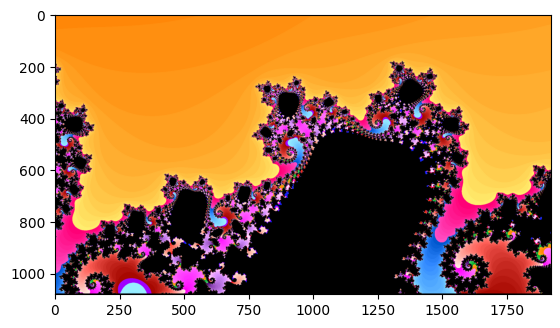

In [43]:
#U,S,V = np.linalg.svd(img, full_matrices=False)

img = np.array(im, dtype=np.float32)


plt.imshow(im)

Раскладываем в RGB

In [142]:
r, g, b = im.split()
r,g,b = np.array((r,g,b), dtype=np.float32)

Функция для сжатия. 
Сожмем каждый канал по отдельности

dims are:  (1080, 1080) (1080,) (1080, 1920)
dims are:  (1080, 1080) (1080,) (1080, 1920)
dims are:  (1080, 1080) (1080,) (1080, 1920)


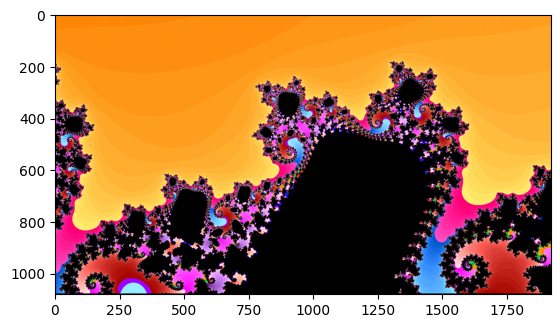

In [209]:
def compress(channel):
    U,S,V = np.linalg.svd(channel, full_matrices=False)
    print("dims are: ", U.shape, S.shape, V.shape)
    z = np.zeros(U.shape)    
    np.fill_diagonal(z, S[:3000])
    k = U@z@V
    return k
rk,gk,bk = compress(r), compress(g), compress(b)

rgb = np.dstack((rk,gk,bk))
new_im  =Image.fromarray(np.asarray(rgb, dtype=np.uint8))
plt.imshow(new_im)
new_im.save("compressed.png")

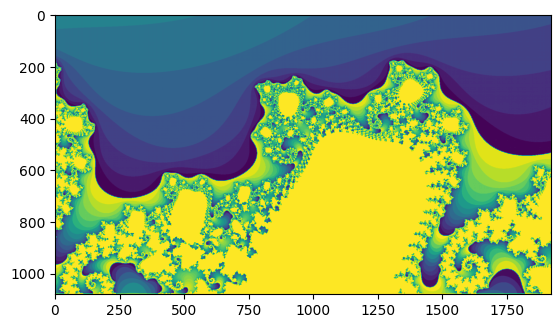

In [177]:
new_im1  =Image.fromarray(np.asarray(rk + gk + bk, dtype=np.uint8))
plt.imshow(invert(new_im1))

In [97]:
a = np.zeros((3,3))
b = np.diag([1,1])

#np.reshape(b, ((b.shape[0], 3),(b.shape[1],3)))
s1,s2 = b.shape
n1,n2 = a.shape
#np.pad(b, ((0,1),(0,1)))
b.resize((3,3))

z= np.zeros((5,5))
np.fill_diagonal(z, [1,2,3])
#np.reshape(b, (8,8))
z


array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 2.]])